In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = '2.csv'
df = pd.read_csv(data)

df = df[(df.正負樣本 == 1) | (df.正負樣本 == -1)]

In [4]:
# 查看數據集的維度
df.shape

(939, 37)

In [5]:
# 讓我們預覽數據集
df.head()

,代碼,股票,ROE_5Y,EPS_5Y,毛利率_5Y,ROE_2017,ROE_2018,ROE_2019,ROE_2020,ROE_2021,...,董監持股,現金殖利率,ROE_Test,EPS_Test,毛利率_Test,現金殖利率_Test,成交價_Test,董監持股_Test,符合數量,正負樣本
0,1101,台泥,11.00,3.69,26.64,6.88,12.94,12.54,13.10,9.54,...,8.38,6.95,1,1,1,1,1,0,5,1
1,1102,亞泥,9.81,4.05,24.67,4.65,9.77,13.54,11.07,10.01,...,27.37,7.10,0,1,1,1,1,1,5,1
2,1103,嘉泥,5.24,1.65,6.44,5.57,3.83,6.32,7.55,2.94,...,17.15,5.45,0,1,0,1,1,1,4,1
3,1104,環泥,6.66,1.82,14.24,8.28,6.01,6.35,6.83,5.84,...,24.16,5.09,0,1,0,1,1,1,4,1
4,1108,幸福,1.71,0.21,8.77,-2.23,-4.66,1.07,8.74,5.64,...,3.95,5.66,0,1,0,1,1,0,3,-1


In [6]:
# 讓我們預覽數據集
col_names = df.columns
col_names

Index(['代碼', '股票', 'ROE_5Y', 'EPS_5Y', '毛利率_5Y', 'ROE_2017', 'ROE_2018',
       'ROE_2019', 'ROE_2020', 'ROE_2021', '毛利率_2017', '毛利率_2018', '毛利率_2019',
       '毛利率_2020', '毛利率_2021', '負債比_2017', '負債比_2018', '負債比_2019', '負債比_2020',
       '負債比_2021', '稅後淨利率_2017', '稅後淨利率_2018', '稅後淨利率_2019', '稅後淨利率_2020',
       '稅後淨利率_2021', '現金股利', '成交價', '董監持股', '現金殖利率', 'ROE_Test', 'EPS_Test',
       '毛利率_Test', '現金殖利率_Test', '成交價_Test', '董監持股_Test', '符合數量', '正負樣本'],
      dtype='object')

In [7]:
# 從列名中刪除前導空格
df.columns = df.columns.str.strip()
df.columns

Index(['代碼', '股票', 'ROE_5Y', 'EPS_5Y', '毛利率_5Y', 'ROE_2017', 'ROE_2018',
       'ROE_2019', 'ROE_2020', 'ROE_2021', '毛利率_2017', '毛利率_2018', '毛利率_2019',
       '毛利率_2020', '毛利率_2021', '負債比_2017', '負債比_2018', '負債比_2019', '負債比_2020',
       '負債比_2021', '稅後淨利率_2017', '稅後淨利率_2018', '稅後淨利率_2019', '稅後淨利率_2020',
       '稅後淨利率_2021', '現金股利', '成交價', '董監持股', '現金殖利率', 'ROE_Test', 'EPS_Test',
       '毛利率_Test', '現金殖利率_Test', '成交價_Test', '董監持股_Test', '符合數量', '正負樣本'],
      dtype='object')

In [8]:
# 檢查 All 列的分佈
df['正負樣本'].value_counts()

 1    489
-1    450
Name: 正負樣本, dtype: int64

In [9]:
# 查看 All 列的百分比分佈
df['正負樣本'].value_counts()/np.float(len(df))

 1    0.520767
-1    0.479233
Name: 正負樣本, dtype: float64

In [10]:
# 查看數據集摘要
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 939 entries, 0 to 938
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   代碼          939 non-null    int64  
 1   股票          939 non-null    object 
 2   ROE_5Y      939 non-null    float64
 3   EPS_5Y      939 non-null    float64
 4   毛利率_5Y      939 non-null    float64
 5   ROE_2017    939 non-null    float64
 6   ROE_2018    939 non-null    float64
 7   ROE_2019    939 non-null    float64
 8   ROE_2020    939 non-null    float64
 9   ROE_2021    939 non-null    float64
 10  毛利率_2017    939 non-null    float64
 11  毛利率_2018    939 non-null    float64
 12  毛利率_2019    939 non-null    float64
 13  毛利率_2020    939 non-null    float64
 14  毛利率_2021    939 non-null    float64
 15  負債比_2017    939 non-null    float64
 16  負債比_2018    939 non-null    float64
 17  負債比_2019    939 non-null    float64
 18  負債比_2020    939 non-null    float64
 19  負債比_2021    939 non-null    f

In [11]:
# 檢查變量中的缺失值
df.isnull().sum()

代碼            0
股票            0
ROE_5Y        0
EPS_5Y        0
毛利率_5Y        0
ROE_2017      0
ROE_2018      0
ROE_2019      0
ROE_2020      0
ROE_2021      0
毛利率_2017      0
毛利率_2018      0
毛利率_2019      0
毛利率_2020      0
毛利率_2021      0
負債比_2017      0
負債比_2018      0
負債比_2019      0
負債比_2020      0
負債比_2021      0
稅後淨利率_2017    0
稅後淨利率_2018    0
稅後淨利率_2019    0
稅後淨利率_2020    0
稅後淨利率_2021    0
現金股利          0
成交價           0
董監持股          0
現金殖利率         0
ROE_Test      0
EPS_Test      0
毛利率_Test      0
現金殖利率_Test    0
成交價_Test      0
董監持股_Test     0
符合數量          0
正負樣本          0
dtype: int64

In [12]:
# 查看數值變量中的匯總統計
round(df.describe(),2)

,代碼,ROE_5Y,EPS_5Y,毛利率_5Y,ROE_2017,ROE_2018,ROE_2019,ROE_2020,ROE_2021,毛利率_2017,...,董監持股,現金殖利率,ROE_Test,EPS_Test,毛利率_Test,現金殖利率_Test,成交價_Test,董監持股_Test,符合數量,正負樣本
count,939.00,939.00,939.00,939.00,939.00,939.00,939.00,939.00,939.00,939.00,...,939.00,939.00,939.00,939.00,939.00,939.00,939.00,939.00,939.0,939.00
mean,3749.97,7.19,3.23,21.31,6.53,7.09,6.06,6.27,10.34,21.59,...,20.15,4.17,0.41,0.85,0.51,0.33,0.83,0.67,3.6,0.04
std,2324.85,15.02,7.36,21.29,20.08,18.91,15.61,30.09,18.03,22.07,...,17.10,2.94,0.49,0.36,0.50,0.47,0.38,0.47,1.2,1.00
min,1101.00,-215.93,-7.49,-316.78,-287.14,-315.90,-154.95,-786.28,-131.17,-333.36,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,-1.00
25%,2106.50,3.14,0.58,11.51,1.89,2.11,1.47,2.14,4.26,11.97,...,8.06,2.35,0.00,1.00,0.00,0.00,1.00,0.00,3.0,-1.00
50%,2880.00,8.29,1.85,20.21,7.34,7.75,7.33,7.41,10.10,19.62,...,15.49,3.87,0.00,1.00,1.00,0.00,1.00,1.00,4.0,1.00
75%,5229.50,13.84,4.14,29.78,14.02,14.42,12.60,13.83,17.02,30.37,...,28.38,5.64,1.00,1.00,1.00,1.00,1.00,1.00,4.0,1.00
max,9958.00,48.52,181.64,99.80,69.68,91.60,109.75,83.11,122.37,99.68,...,90.70,32.31,1.00,1.00,1.00,1.00,1.00,1.00,6.0,1.00


Text(0, 0.5, 'ROE_2021')

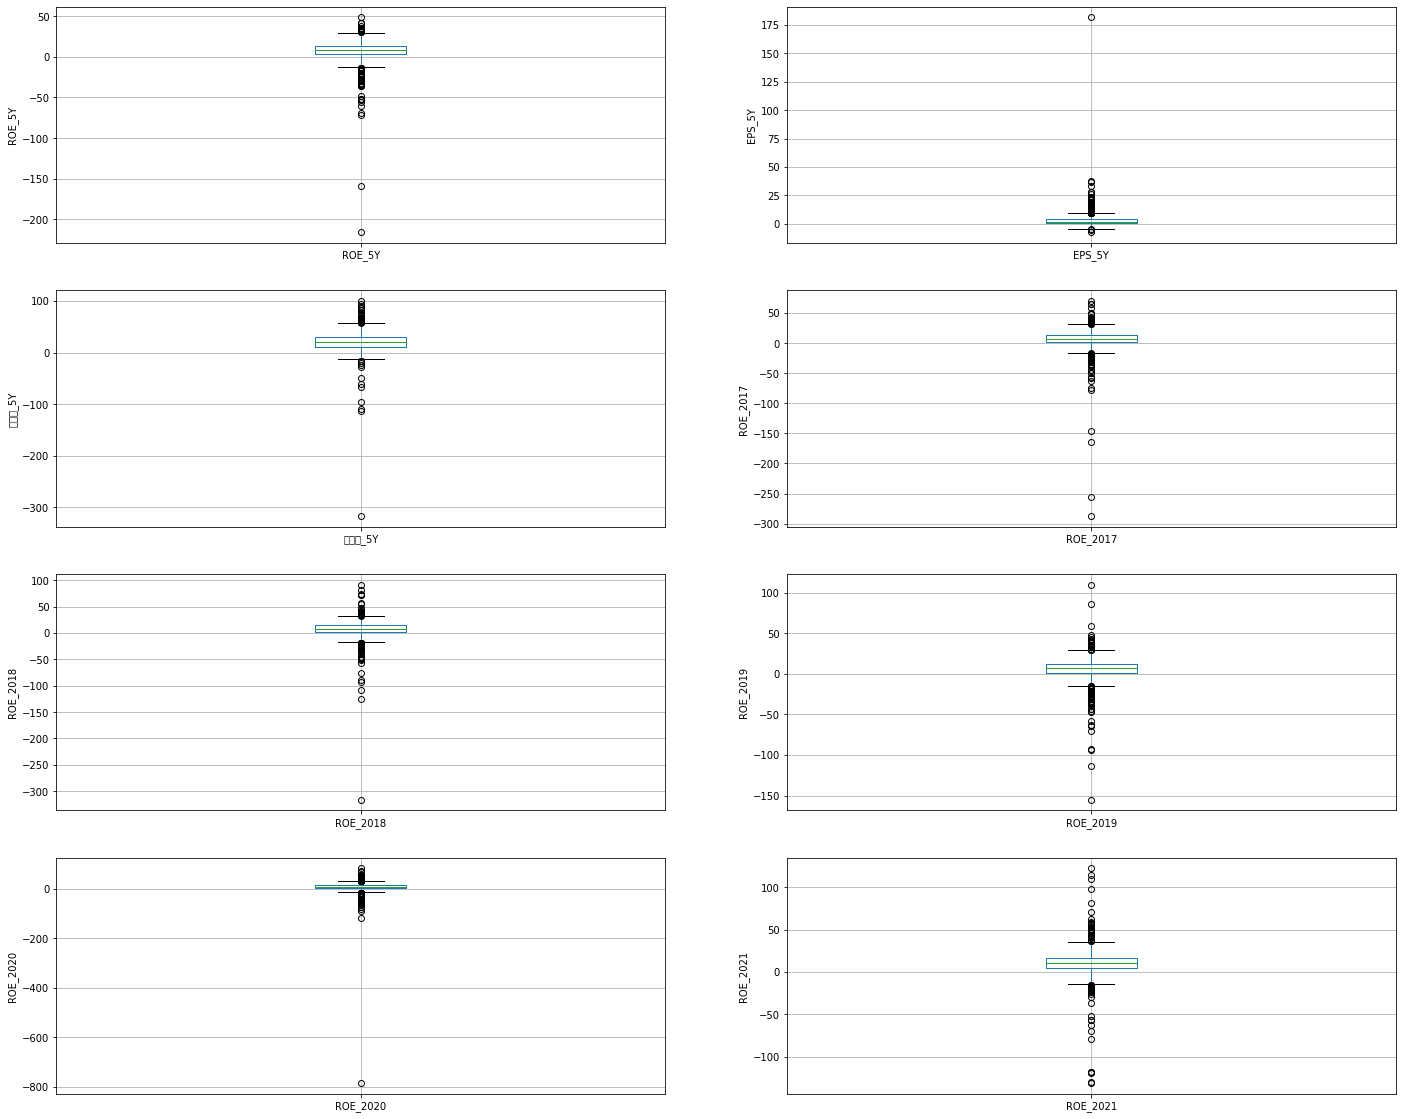

In [13]:
# 繪製箱線圖以可視化異常值
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='ROE_5Y')
fig.set_title('')
fig.set_ylabel('ROE_5Y')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='EPS_5Y')
fig.set_title('')
fig.set_ylabel('EPS_5Y')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='毛利率_5Y')
fig.set_title('')
fig.set_ylabel('毛利率_5Y')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='ROE_2017')
fig.set_title('')
fig.set_ylabel('ROE_2017')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='ROE_2018')
fig.set_title('')
fig.set_ylabel('ROE_2018')

plt.subplot(4, 2, 6)
fig = df.boxplot(column='ROE_2019')
fig.set_title('')
fig.set_ylabel('ROE_2019')

plt.subplot(4, 2, 7)
fig = df.boxplot(column='ROE_2020')
fig.set_title('')
fig.set_ylabel('ROE_2020')

plt.subplot(4, 2, 8)
fig = df.boxplot(column='ROE_2021')
fig.set_title('')
fig.set_ylabel('ROE_2021')

Text(0, 0.5, '毛利率_2021')

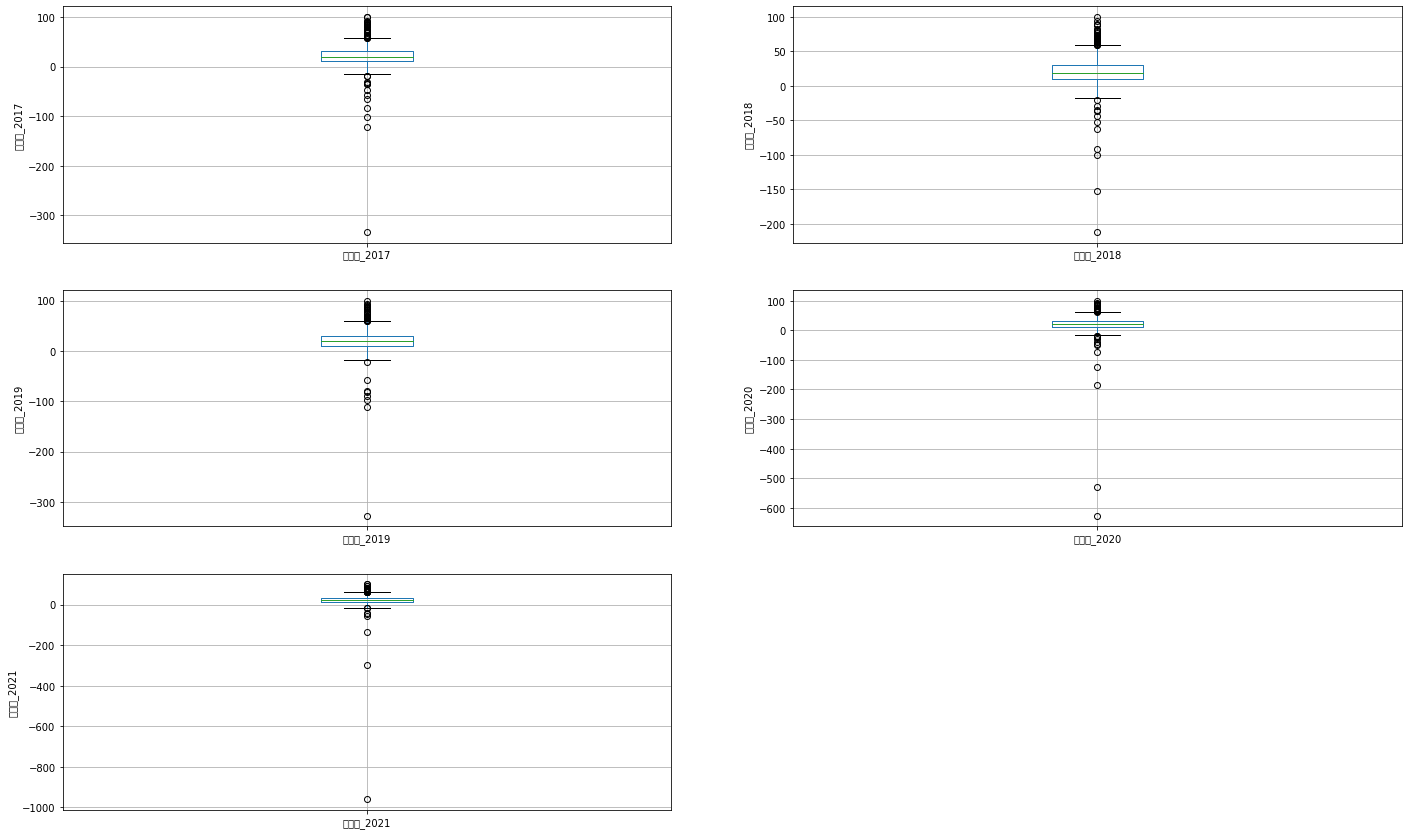

In [14]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='毛利率_2017')
fig.set_title('')
fig.set_ylabel('毛利率_2017')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='毛利率_2018')
fig.set_title('')
fig.set_ylabel('毛利率_2018')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='毛利率_2019')
fig.set_title('')
fig.set_ylabel('毛利率_2019')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='毛利率_2020')
fig.set_title('')
fig.set_ylabel('毛利率_2020')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='毛利率_2021')
fig.set_title('')
fig.set_ylabel('毛利率_2021')

Text(0, 0.5, '負債比_2021')

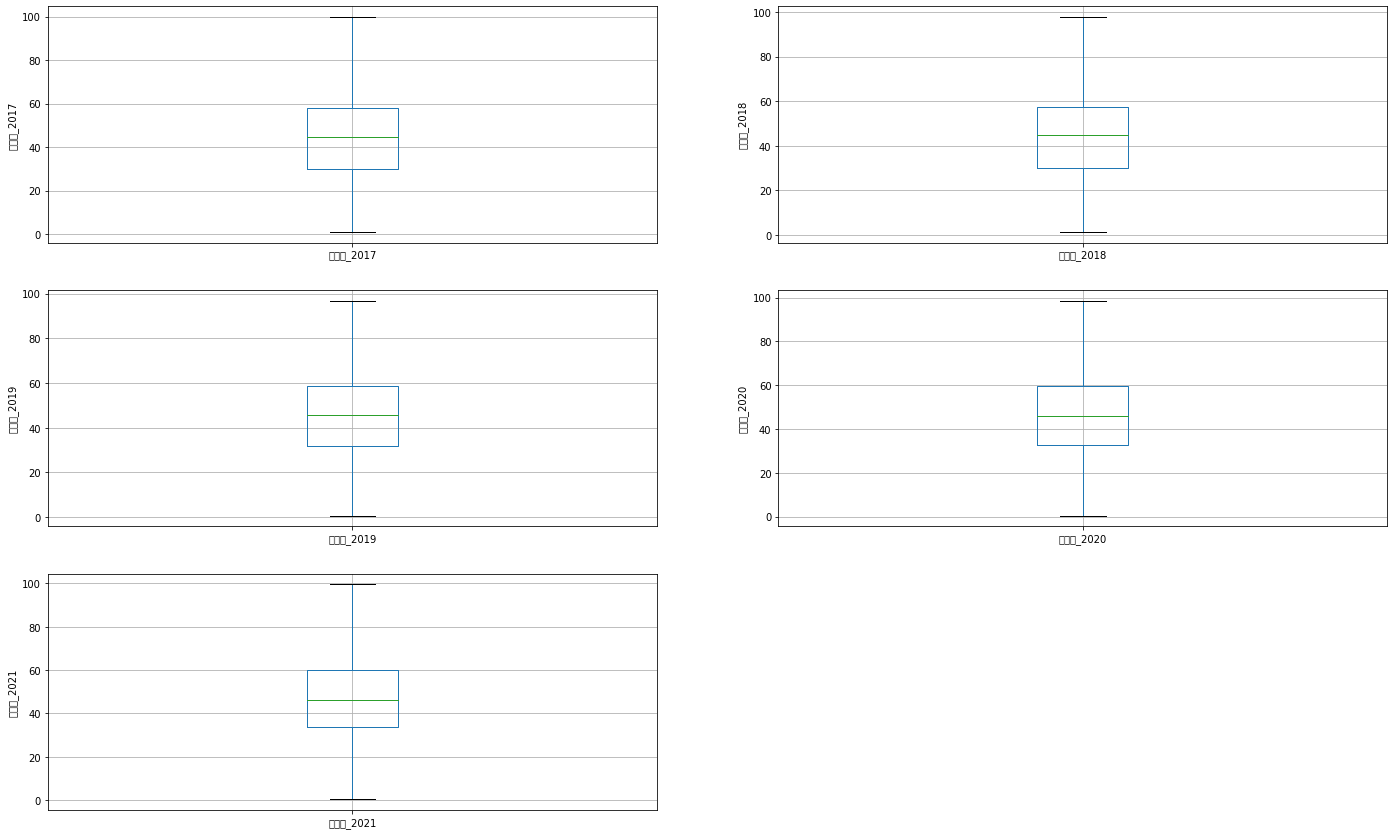

In [15]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='負債比_2017')
fig.set_title('')
fig.set_ylabel('負債比_2017')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='負債比_2018')
fig.set_title('')
fig.set_ylabel('負債比_2018')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='負債比_2019')
fig.set_title('')
fig.set_ylabel('負債比_2019')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='負債比_2020')
fig.set_title('')
fig.set_ylabel('負債比_2020')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='負債比_2021')
fig.set_title('')
fig.set_ylabel('負債比_2021')


Text(0, 0.5, '稅後淨利率_2021')

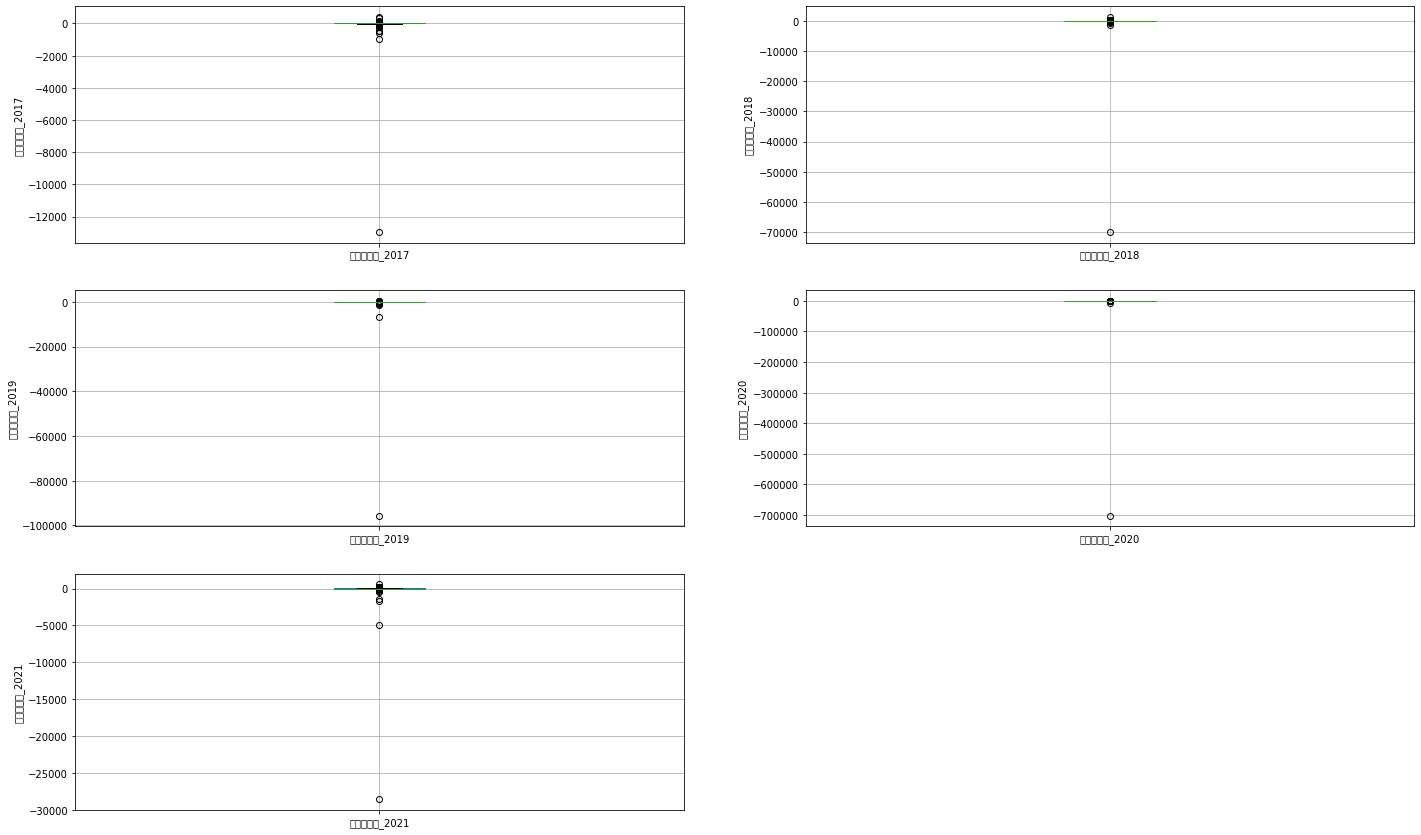

In [16]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='稅後淨利率_2017')
fig.set_title('')
fig.set_ylabel('稅後淨利率_2017')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='稅後淨利率_2018')
fig.set_title('')
fig.set_ylabel('稅後淨利率_2018')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='稅後淨利率_2019')
fig.set_title('')
fig.set_ylabel('稅後淨利率_2019')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='稅後淨利率_2020')
fig.set_title('')
fig.set_ylabel('稅後淨利率_2020')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='稅後淨利率_2021')
fig.set_title('')
fig.set_ylabel('稅後淨利率_2021')

Text(0, 0.5, '現金殖利率')

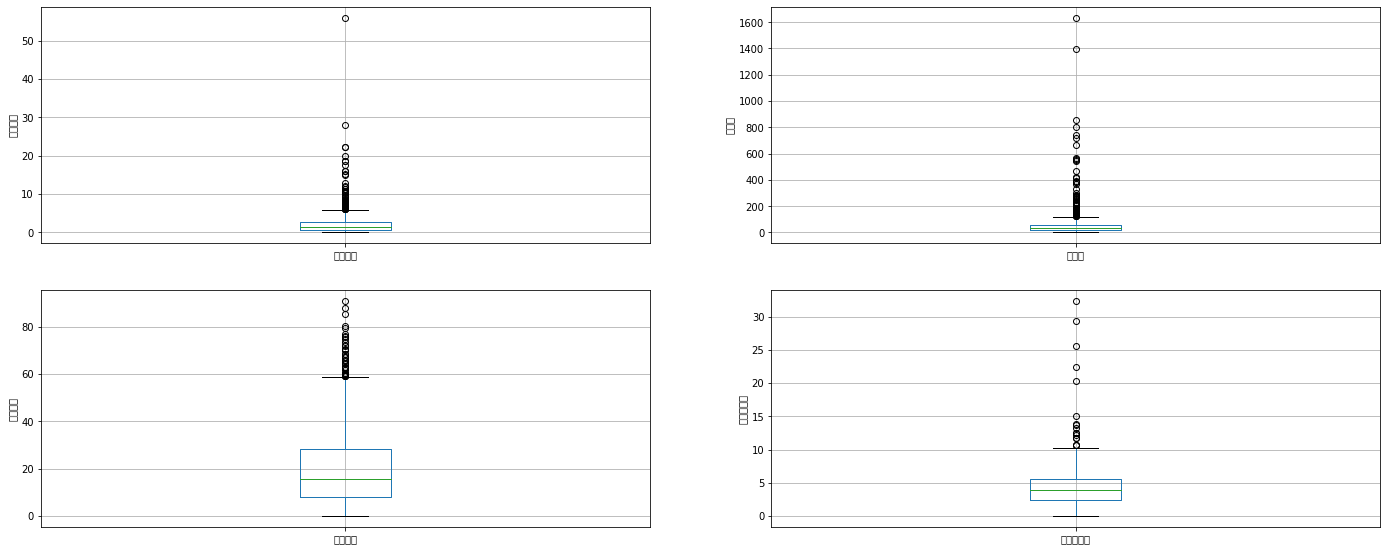

In [17]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='現金股利')
fig.set_title('')
fig.set_ylabel('現金股利')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='成交價')
fig.set_title('')
fig.set_ylabel('成交價')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='董監持股')
fig.set_title('')
fig.set_ylabel('董監持股')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='現金殖利率')
fig.set_title('')
fig.set_ylabel('現金殖利率')

Text(0, 0.5, 'Number of pulsar stars')

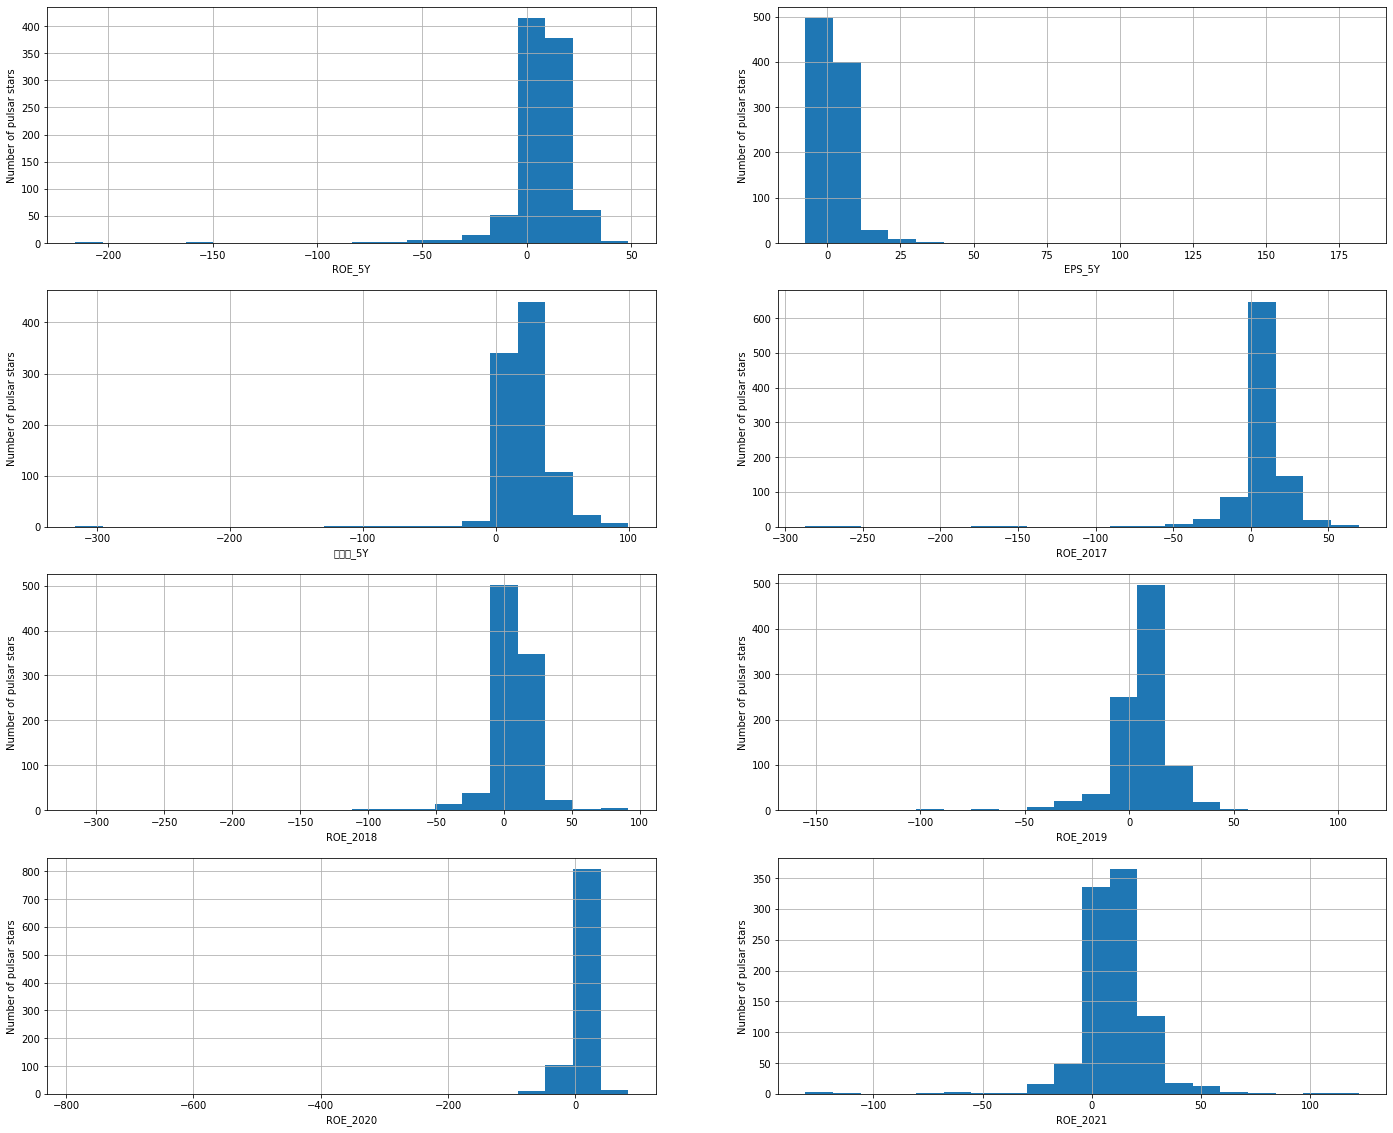

In [18]:
# 繪製直方圖以檢查分佈
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['ROE_5Y'].hist(bins=20)
fig.set_xlabel('ROE_5Y')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['EPS_5Y'].hist(bins=20)
fig.set_xlabel('EPS_5Y')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['毛利率_5Y'].hist(bins=20)
fig.set_xlabel('毛利率_5Y')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['ROE_2017'].hist(bins=20)
fig.set_xlabel('ROE_2017')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['ROE_2018'].hist(bins=20)
fig.set_xlabel('ROE_2018')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 6)
fig = df['ROE_2019'].hist(bins=20)
fig.set_xlabel('ROE_2019')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 7)
fig = df['ROE_2020'].hist(bins=20)
fig.set_xlabel('ROE_2020')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 8)
fig = df['ROE_2021'].hist(bins=20)
fig.set_xlabel('ROE_2021')
fig.set_ylabel('Number of pulsar stars')

Text(0, 0.5, 'Number of pulsar stars')

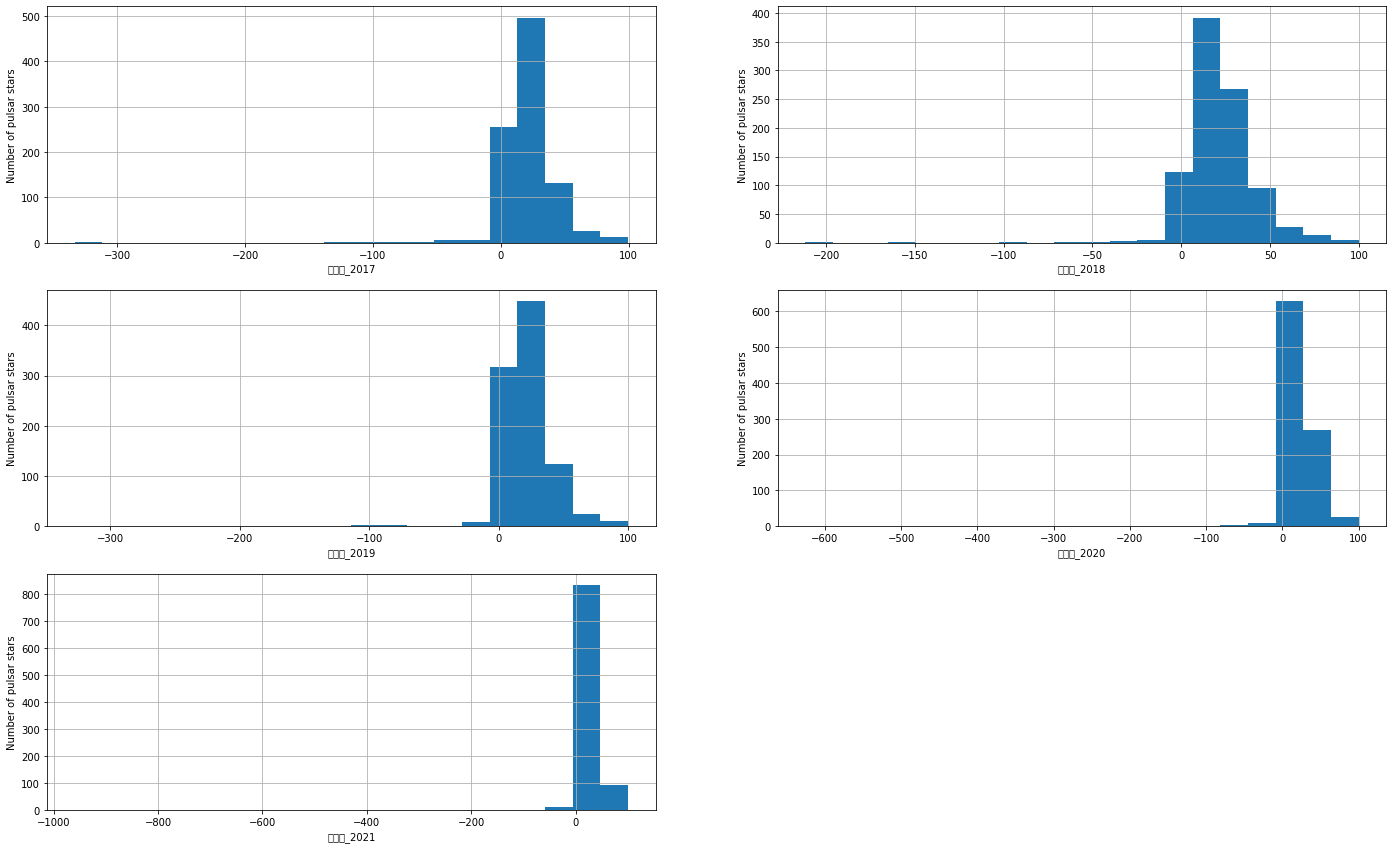

In [19]:
# 繪製直方圖以檢查分佈
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['毛利率_2017'].hist(bins=20)
fig.set_xlabel('毛利率_2017')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['毛利率_2018'].hist(bins=20)
fig.set_xlabel('毛利率_2018')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['毛利率_2019'].hist(bins=20)
fig.set_xlabel('毛利率_2019')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['毛利率_2020'].hist(bins=20)
fig.set_xlabel('毛利率_2020')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['毛利率_2021'].hist(bins=20)
fig.set_xlabel('毛利率_2021')
fig.set_ylabel('Number of pulsar stars')

Text(0, 0.5, 'Number of pulsar stars')

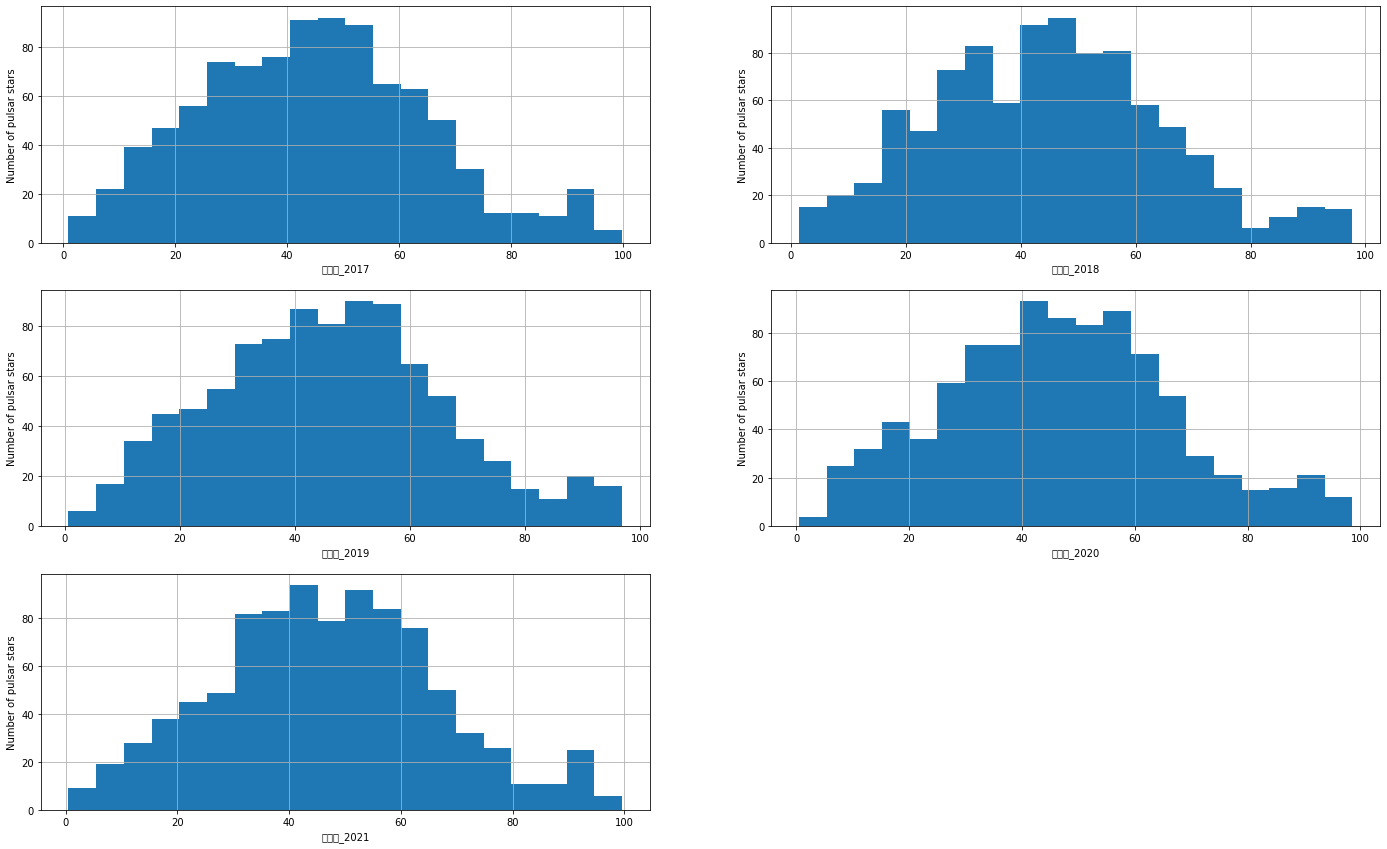

In [20]:
# 繪製直方圖以檢查分佈
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['負債比_2017'].hist(bins=20)
fig.set_xlabel('負債比_2017')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['負債比_2018'].hist(bins=20)
fig.set_xlabel('負債比_2018')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['負債比_2019'].hist(bins=20)
fig.set_xlabel('負債比_2019')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['負債比_2020'].hist(bins=20)
fig.set_xlabel('負債比_2020')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['負債比_2021'].hist(bins=20)
fig.set_xlabel('負債比_2021')
fig.set_ylabel('Number of pulsar stars')

Text(0, 0.5, 'Number of pulsar stars')

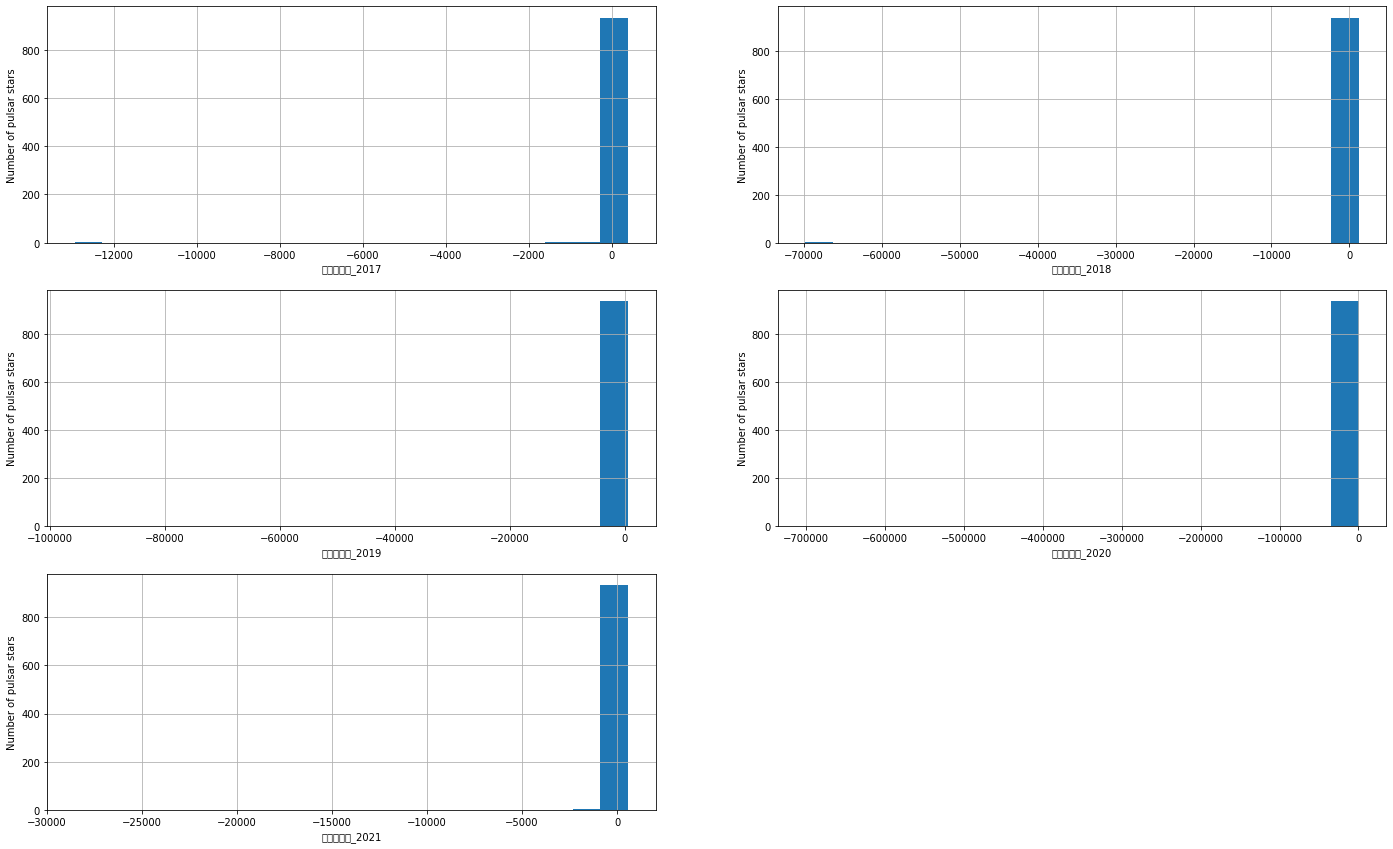

In [21]:
# 繪製直方圖以檢查分佈
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['稅後淨利率_2017'].hist(bins=20)
fig.set_xlabel('稅後淨利率_2017')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['稅後淨利率_2018'].hist(bins=20)
fig.set_xlabel('稅後淨利率_2018')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['稅後淨利率_2019'].hist(bins=20)
fig.set_xlabel('稅後淨利率_2019')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['稅後淨利率_2020'].hist(bins=20)
fig.set_xlabel('稅後淨利率_2020')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['稅後淨利率_2021'].hist(bins=20)
fig.set_xlabel('稅後淨利率_2021')
fig.set_ylabel('Number of pulsar stars')

Text(0, 0.5, 'Number of pulsar stars')

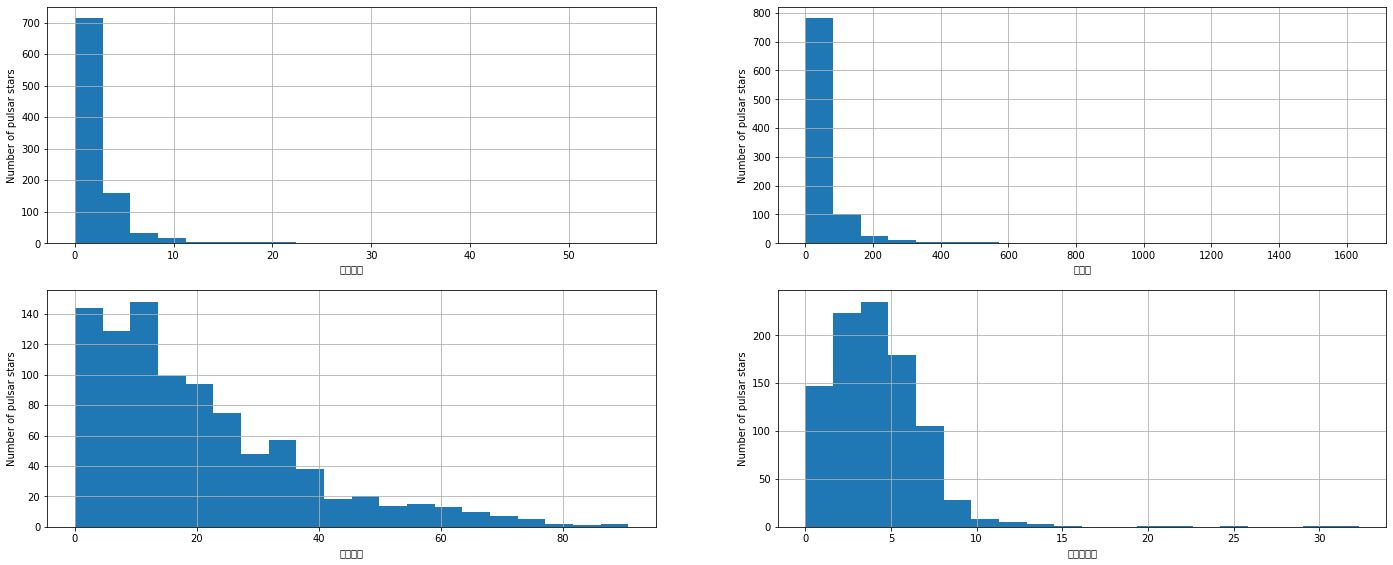

In [22]:
# 繪製直方圖以檢查分佈
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['現金股利'].hist(bins=20)
fig.set_xlabel('現金股利')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['成交價'].hist(bins=20)
fig.set_xlabel('成交價')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['董監持股'].hist(bins=20)
fig.set_xlabel('董監持股')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['現金殖利率'].hist(bins=20)
fig.set_xlabel('現金殖利率')
fig.set_ylabel('Number of pulsar stars')

In [23]:
X = df.drop(['代碼', '股票', 'ROE_Test', 'EPS_Test', '毛利率_Test', '現金殖利率_Test', '成交價_Test', '董監持股_Test','符合數量','正負樣本'], axis=1)

y = df['正負樣本']

In [24]:
# 將 X 和 y 拆分為訓練集和測試集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [25]:
# 檢查 X_train 和 X_test 的形狀
X_train.shape, X_test.shape

((657, 27), (282, 27))

In [26]:
cols = X_train.columns

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [28]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [29]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [30]:
X_train.describe()

,ROE_5Y,EPS_5Y,毛利率_5Y,ROE_2017,ROE_2018,ROE_2019,ROE_2020,ROE_2021,毛利率_2017,毛利率_2018,...,負債比_2021,稅後淨利率_2017,稅後淨利率_2018,稅後淨利率_2019,稅後淨利率_2020,稅後淨利率_2021,現金股利,成交價,董監持股,現金殖利率
count,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02,...,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02,6.570000e+02
mean,-2.433366e-17,-2.162992e-17,6.421381e-17,-1.622244e-17,-1.351870e-17,-3.785235e-17,-8.111218e-18,-3.514861e-17,5.407479e-17,1.514094e-16,...,4.325983e-17,2.703739e-18,1.351870e-17,-6.759349e-18,-1.622244e-17,-5.407479e-18,4.866731e-17,-2.433366e-17,-6.218601e-17,-8.111218e-17
std,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00,...,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00,1.000762e+00
min,-1.391369e+01,-1.308173e+00,-1.502690e+01,-1.369800e+01,-1.644215e+01,-9.919630e+00,-2.299859e+01,-7.659868e+00,-1.540074e+01,-8.922628e+00,...,-2.188123e+00,-1.729204e+01,-1.806913e+01,-1.721388e+01,-2.561247e+01,-2.552741e+01,-6.423090e-01,-5.532887e-01,-1.159831e+00,-1.398254e+00
25%,-1.978410e-01,-3.227414e-01,-4.365459e-01,-1.902850e-01,-2.375317e-01,-2.780872e-01,-1.096098e-01,-3.062104e-01,-4.148607e-01,-5.461506e-01,...,-6.970467e-01,-2.838210e-02,-2.733474e-02,-4.866085e-03,3.893765e-02,3.685087e-02,-4.745009e-01,-3.830691e-01,-6.923160e-01,-6.105159e-01
50%,8.931032e-02,-1.748661e-01,-5.614450e-02,5.204986e-02,4.466867e-02,8.598874e-02,4.251123e-02,1.909775e-03,-7.593937e-02,-1.055266e-01,...,-1.828073e-02,3.762667e-02,2.229528e-02,5.803269e-02,3.910405e-02,4.129238e-02,-2.661873e-01,-2.589704e-01,-2.884206e-01,-1.031591e-01
75%,3.945647e-01,9.179435e-02,4.144689e-01,3.597544e-01,3.788265e-01,3.983178e-01,2.242436e-01,3.669888e-01,4.092258e-01,4.855668e-01,...,6.655057e-01,1.383032e-01,9.545273e-02,1.467546e-01,3.931250e-02,4.739946e-02,1.677994e-01,2.774032e-02,4.504979e-01,4.843067e-01
max,2.594394e+00,2.161614e+01,3.485677e+00,2.713997e+00,3.768797e+00,6.386781e+00,2.240427e+00,5.399980e+00,3.391386e+00,4.030587e+00,...,2.649591e+00,6.937557e+00,1.383712e+01,8.008957e+00,4.832653e-02,2.507777e-01,1.556854e+01,1.499471e+01,3.966489e+00,9.386416e+00


In [31]:
# 導入 SVC 分類器
from sklearn.svm import SVC


# 導入指標以計算準確性
from sklearn.metrics import accuracy_score


# 使用默認超參數實例化分類器
svc=SVC() 


# 將分類器擬合到訓練集
svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred=svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8369


In [32]:
# 使用 rbf 內核和 C=100 實例化分類器
svc=SVC(C=100.0) 


# 將分類器擬合到訓練集
svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred=svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.8440


In [33]:
# 使用 rbf 內核和 C=1000 實例化分類器
svc=SVC(C=1000.0) 


# 將分類器擬合到訓練集
svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred=svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.8333


In [34]:
# 使用線性核和 C=1.0 實例化分類器
linear_svc=SVC(kernel='linear', C=1.0) 


# 將分類器擬合到訓練集
linear_svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred_test=linear_svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.8014


In [35]:
# 使用線性核和 C=100.0 實例化分類器
linear_svc100=SVC(kernel='linear', C=100.0) 


# 將分類器擬合到訓練集
linear_svc100.fit(X_train, y_train)


# 對測試集進行預測
y_pred=linear_svc100.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.8014


In [36]:
# 用線性核和 C=1000.0 實例化分類器
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# 將分類器擬合到訓練集
linear_svc1000.fit(X_train, y_train)


# 對測試集進行預測
y_pred=linear_svc1000.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.7979


In [37]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([-1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
       -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,
        1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,
       -1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,
       -1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1,
        1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,
        1, -1,  1, -1,  1

In [38]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8508


In [39]:
# 打印訓練和測試集的分數

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.8508
Test set score: 0.8014


In [40]:
# 檢查測試集中的類分佈
y_test.value_counts()

-1    144
 1    138
Name: 正負樣本, dtype: int64

In [41]:
# 檢查空準確度分數

null_accuracy = (144/(144+138))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5106


In [42]:
# 使用多項式內核和 C=1.0 實例化分類器
poly_svc=SVC(kernel='poly', C=1.0) 


# 將分類器擬合到訓練集
poly_svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred=poly_svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.6667


In [43]:
# 使用多項式內核和 C=100.0 實例化分類器
poly_svc100=SVC(kernel='poly', C=100.0) 


# 將分類器擬合到訓練集
poly_svc100.fit(X_train, y_train)


# 對測試集進行預測
y_pred=poly_svc100.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.7908


In [44]:
# 使用 sigmoid 內核和 C=1.0 實例化分類器
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# 將分類器擬合到訓練集
sigmoid_svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred=sigmoid_svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.7695


In [45]:
# 使用 sigmoid 內核和 C=100.0 實例化分類器
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# 將分類器擬合到訓練集
sigmoid_svc100.fit(X_train,y_train)


# 對測試集進行預測
y_pred=sigmoid_svc100.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.7482


In [46]:
# 打印混淆矩陣並將其切成四塊

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[110  34]
 [ 22 116]]

True Positives(TP) =  110

True Negatives(TN) =  116

False Positives(FP) =  34

False Negatives(FN) =  22


<AxesSubplot:>

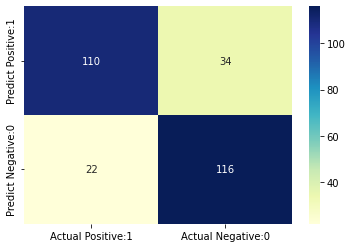

In [47]:
# 使用 seaborn 熱圖可視化混淆矩陣

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       0.83      0.76      0.80       144
           1       0.77      0.84      0.81       138

    accuracy                           0.80       282
   macro avg       0.80      0.80      0.80       282
weighted avg       0.80      0.80      0.80       282



In [49]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [50]:
# 打印分類精度

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8014


In [51]:
# 打印分類錯誤

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1986


In [52]:
# 打印精度分數

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7639


In [53]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8333


In [54]:
true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8333


In [55]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2267


In [56]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7733


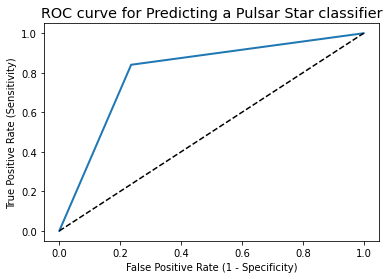

In [57]:
# 繪製 ROC 曲線

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()